In [1]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import datetime as dt
import seaborn as sns
import pandas as pd

start = dt.datetime(2021,1,1)
end = dt.datetime.now()
btc_price = web.DataReader('BTC-USD','yahoo',start,end)
tsla_price = web.DataReader('TSLA','yahoo',start,end)


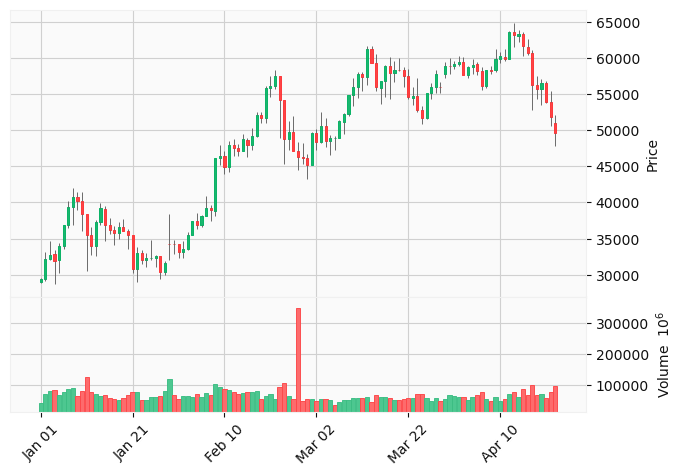

In [2]:
mpf.plot(btc_price, type='candle', style = 'yahoo', volume = True)

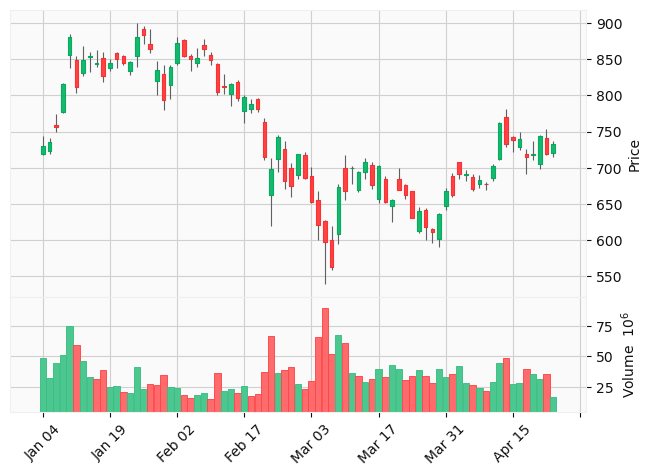

In [3]:
mpf.plot(tsla_price, type='candle', style = 'yahoo', volume = True)

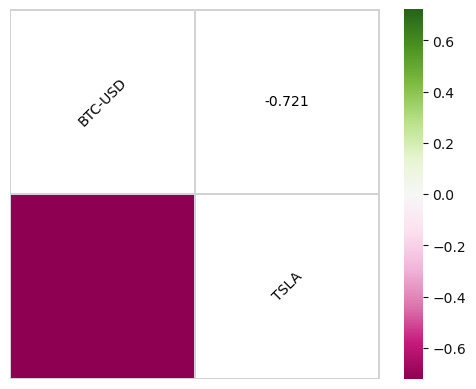

In [4]:
data1 = pd.DataFrame(btc_price['Close'])
data2 = pd.DataFrame(tsla_price['Adj Close'])
data1['BTC-USD']=data1['Close']
data1 = data1.drop('Close',axis=1)
data1['TSLA']=data2['Adj Close']
data1
data1.dropna()
corr = data1.dropna().corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap="PiYG", vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,i+0.5, corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

In [5]:
data1.dropna()

,BTC-USD,TSLA
Date,,
2021-01-04,31971.914062,729.770020
2021-01-05,33992.429688,735.109985
2021-01-06,36824.363281,755.979980
2021-01-07,39371.042969,816.039978
2021-01-08,40797.609375,880.020020
...,...,...
2021-04-16,60683.820312,739.780029
2021-04-19,56473.031250,714.630005
2021-04-20,53906.089844,718.989990
